# Data Set importing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [67]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [3]:
df = sns.load_dataset('penguins')
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


# Preprocessing

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [5]:
df['species'] = df['species'].astype('category')
df['island'] = df['island'].astype('category')
df['sex'] = df['sex'].astype('category')


In [6]:
df.isna().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [7]:
df['sex'] = df['sex'].fillna(df['sex'].mode()[0])
df[['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']] = df[['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']].fillna(df[['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']].mean())

In [8]:
df.isna().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   species            344 non-null    category
 1   island             344 non-null    category
 2   bill_length_mm     344 non-null    float64 
 3   bill_depth_mm      344 non-null    float64 
 4   flipper_length_mm  344 non-null    float64 
 5   body_mass_g        344 non-null    float64 
 6   sex                344 non-null    category
dtypes: category(3), float64(4)
memory usage: 12.3 KB


In [10]:
df.duplicated().sum()

0

# Checking for Outliers

In [11]:
num_cols = df.select_dtypes(include='number').columns
num_cols

Index(['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g'], dtype='object')

<function matplotlib.pyplot.show(close=None, block=None)>

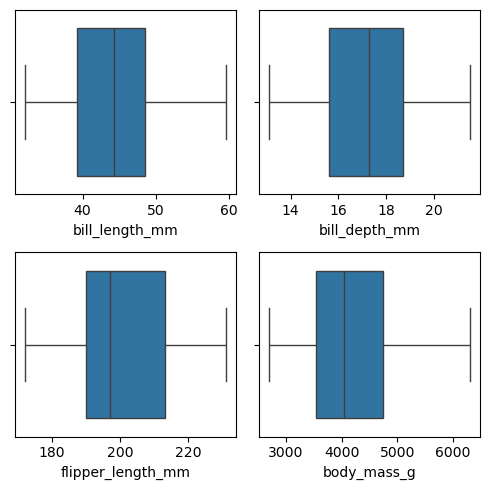

In [12]:
fig,axes = plt.subplots(2,2 , figsize = (5,5))
axes = axes.flatten()
for i,col in enumerate(num_cols):
    sns.boxplot(x = df[col],ax=axes[i])
plt.tight_layout()    
plt.show

In [13]:
def find_outliers_iqr(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    return outliers

for col in num_cols:
    outliers = find_outliers_iqr(df, col)
    print(f"{col}: {len(outliers)} outlier(s)")

bill_length_mm: 0 outlier(s)
bill_depth_mm: 0 outlier(s)
flipper_length_mm: 0 outlier(s)
body_mass_g: 0 outlier(s)


# Visualization

### 1. Univariate Visualization

In [14]:
df.head(3)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female


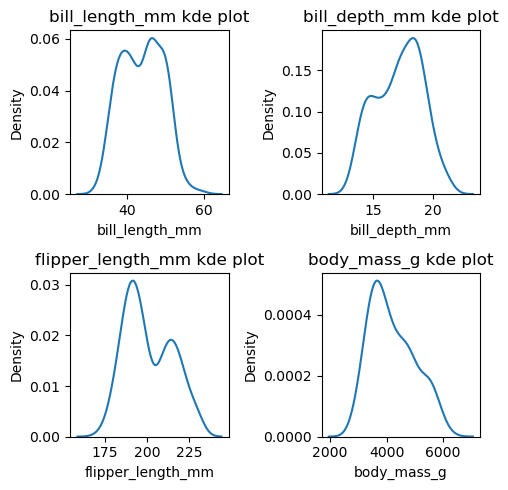

In [81]:
fig,axes = plt.subplots(2,2 , figsize = (5,5))
axes = axes.flatten()
for i,col in enumerate(num_cols):
    sns.kdeplot(x = df[col],ax=axes[i])
    axes[i].set_title(f"{col} kde plot")
plt.tight_layout()    
plt.show()

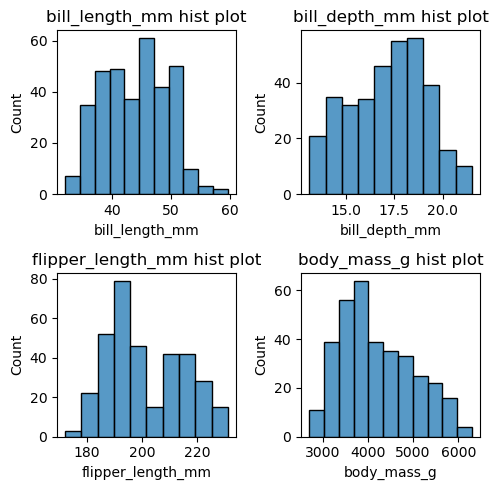

In [80]:
fig,axes = plt.subplots(2,2 , figsize = (5,5))
axes = axes.flatten()
for i,col in enumerate(num_cols):
    sns.histplot(x = df[col],ax=axes[i])
    axes[i].set_title(f"{col} hist plot")
plt.tight_layout()    
plt.show()

In [24]:
cat_cols = df.select_dtypes('category').columns
cat_cols

Index(['species', 'island', 'sex'], dtype='object')

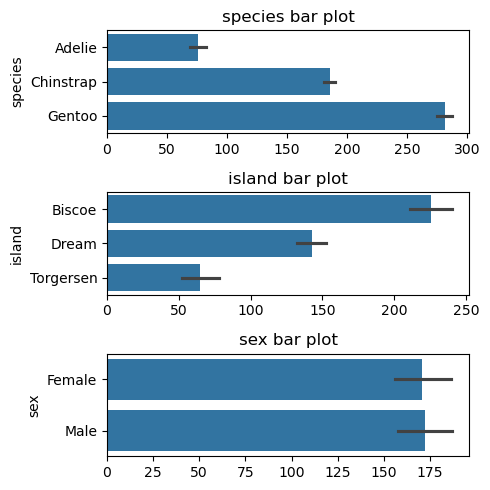

In [79]:
fig,axes = plt.subplots(3, figsize = (5,5))
#axes = axes.flatten()
for i,col in enumerate(cat_cols):
    sns.barplot(df[col],ax=axes[i])
    axes[i].set_title(f"{col} bar plot")
plt.tight_layout()    
plt.show()

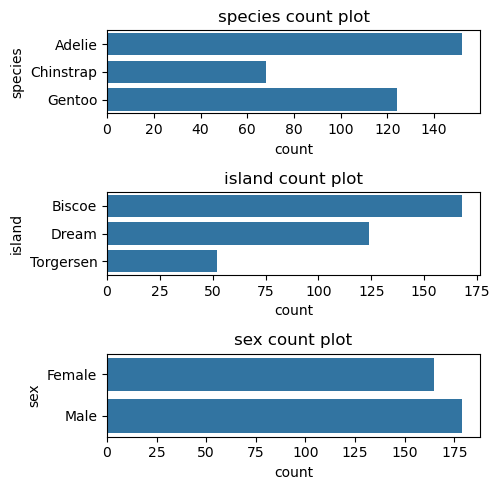

In [78]:
fig,axes = plt.subplots(3, figsize = (5,5))
for i,col in enumerate(cat_cols):
    sns.countplot(df[col],ax=axes[i])
    axes[i].set_title(f"{col} count plot")
plt.tight_layout()    
plt.show()

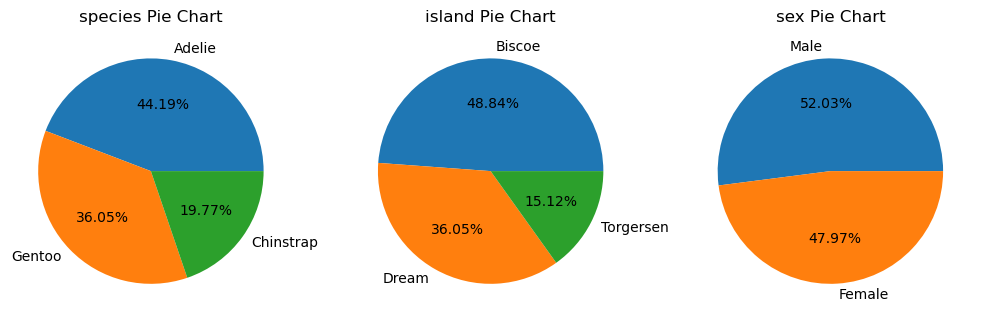

In [124]:
fig,axes = plt.subplots(1,3, figsize = (10,10))
for i,col in enumerate(cat_cols):
    axes[i].pie(df[col].value_counts().values,autopct='%.2f%%',labels = df[col].value_counts().index)
    axes[i].set_title(f"{col} Pie Chart")
plt.tight_layout()    
plt.show()

### 2. Bivariate Visualization

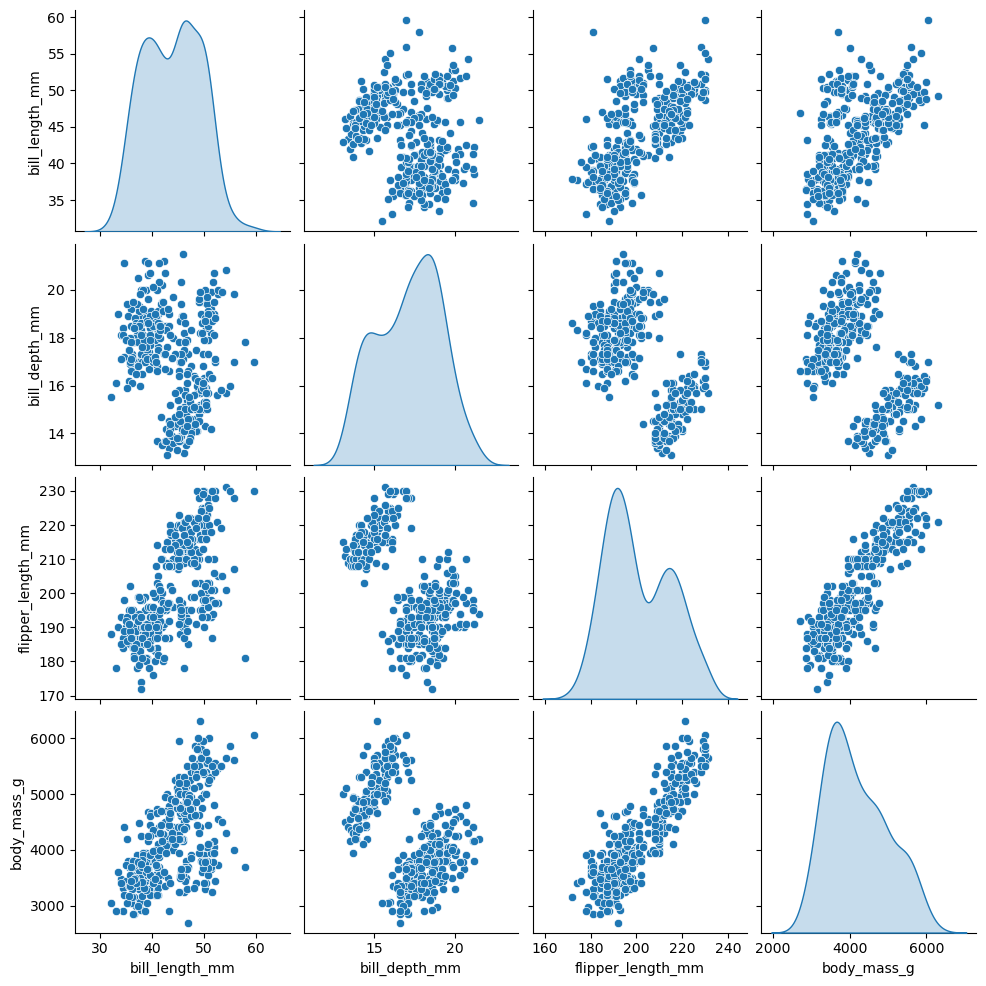

In [82]:
sns.pairplot(df,diag_kind='kde')
plt.show()

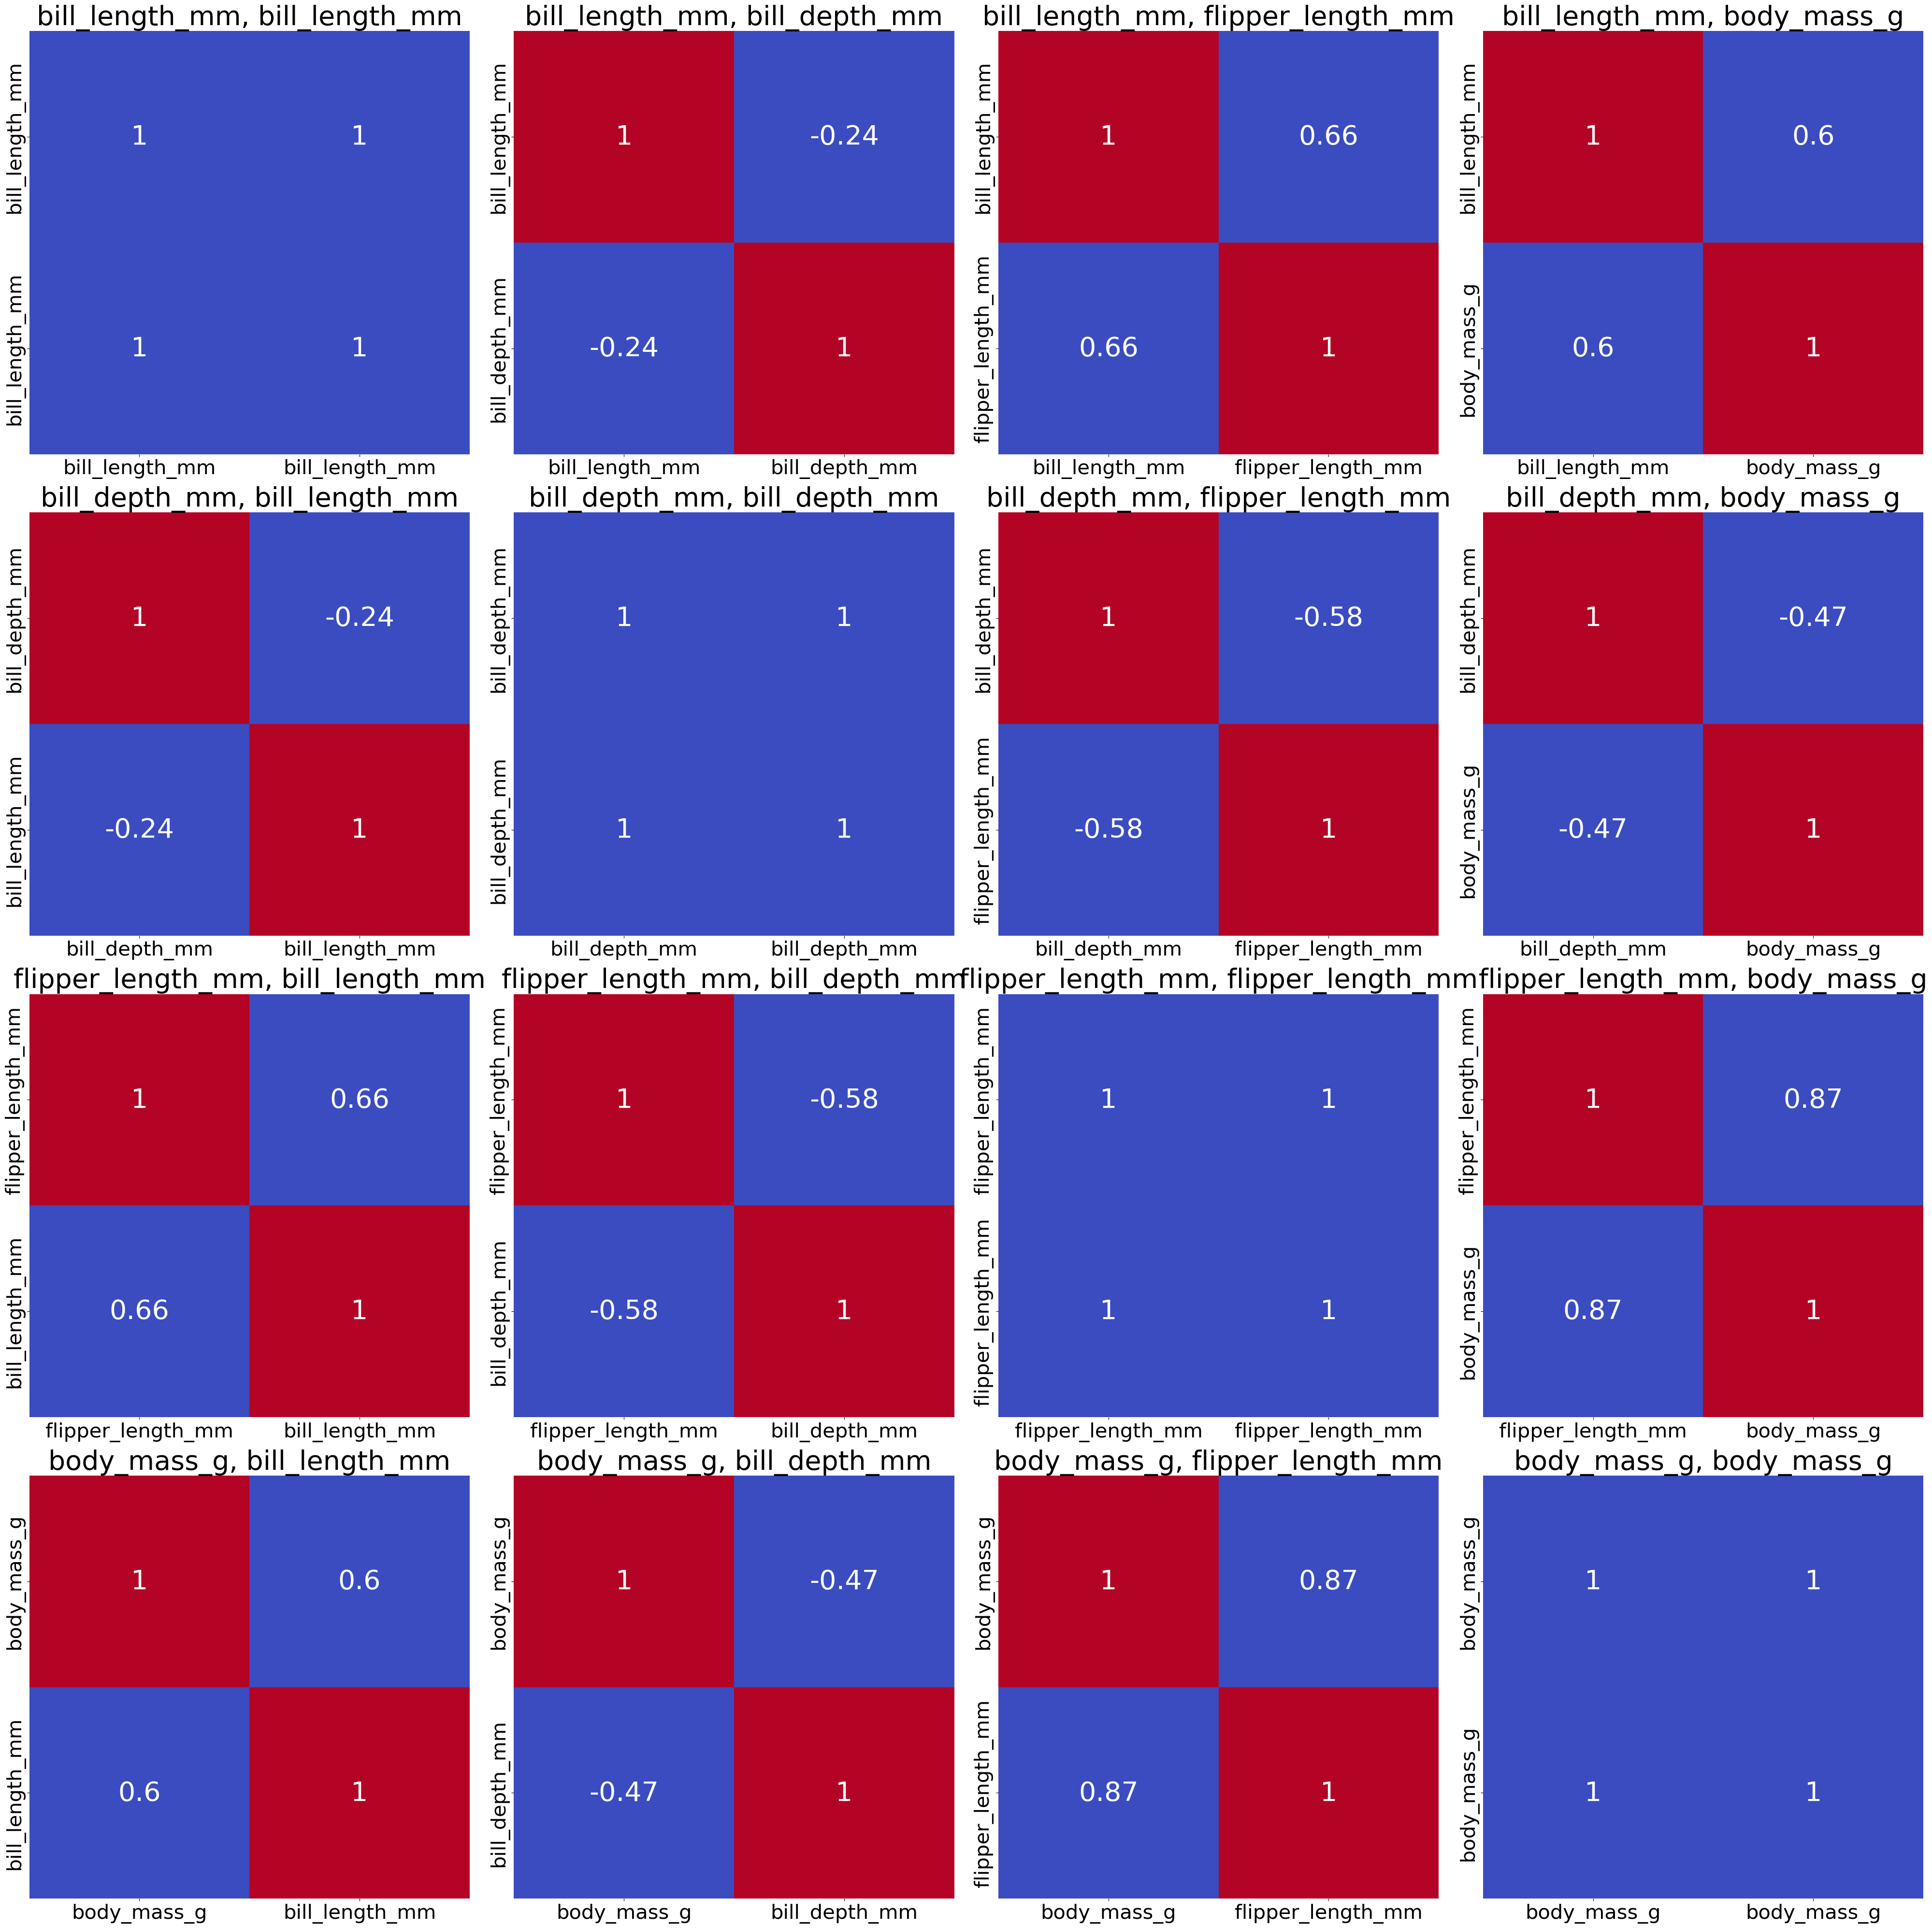

In [95]:
fig, axes = plt.subplots(4, 4, figsize=(40, 40))

for i, col1 in enumerate(num_cols):
    for j, col2 in enumerate(num_cols):
        ax = axes[i][j]
        sns.heatmap(
            df[[col1, col2]].corr(),
            ax=ax,
            annot=True,
            annot_kws={"size": 40},     # Annotation font size
            cbar=False,
            cmap='coolwarm'
        )
        ax.set_title(f"{col1}, {col2}", fontsize=40)
        ax.tick_params(axis='x', labelsize=30)
        ax.tick_params(axis='y', labelsize=30)

plt.tight_layout()
plt.show()

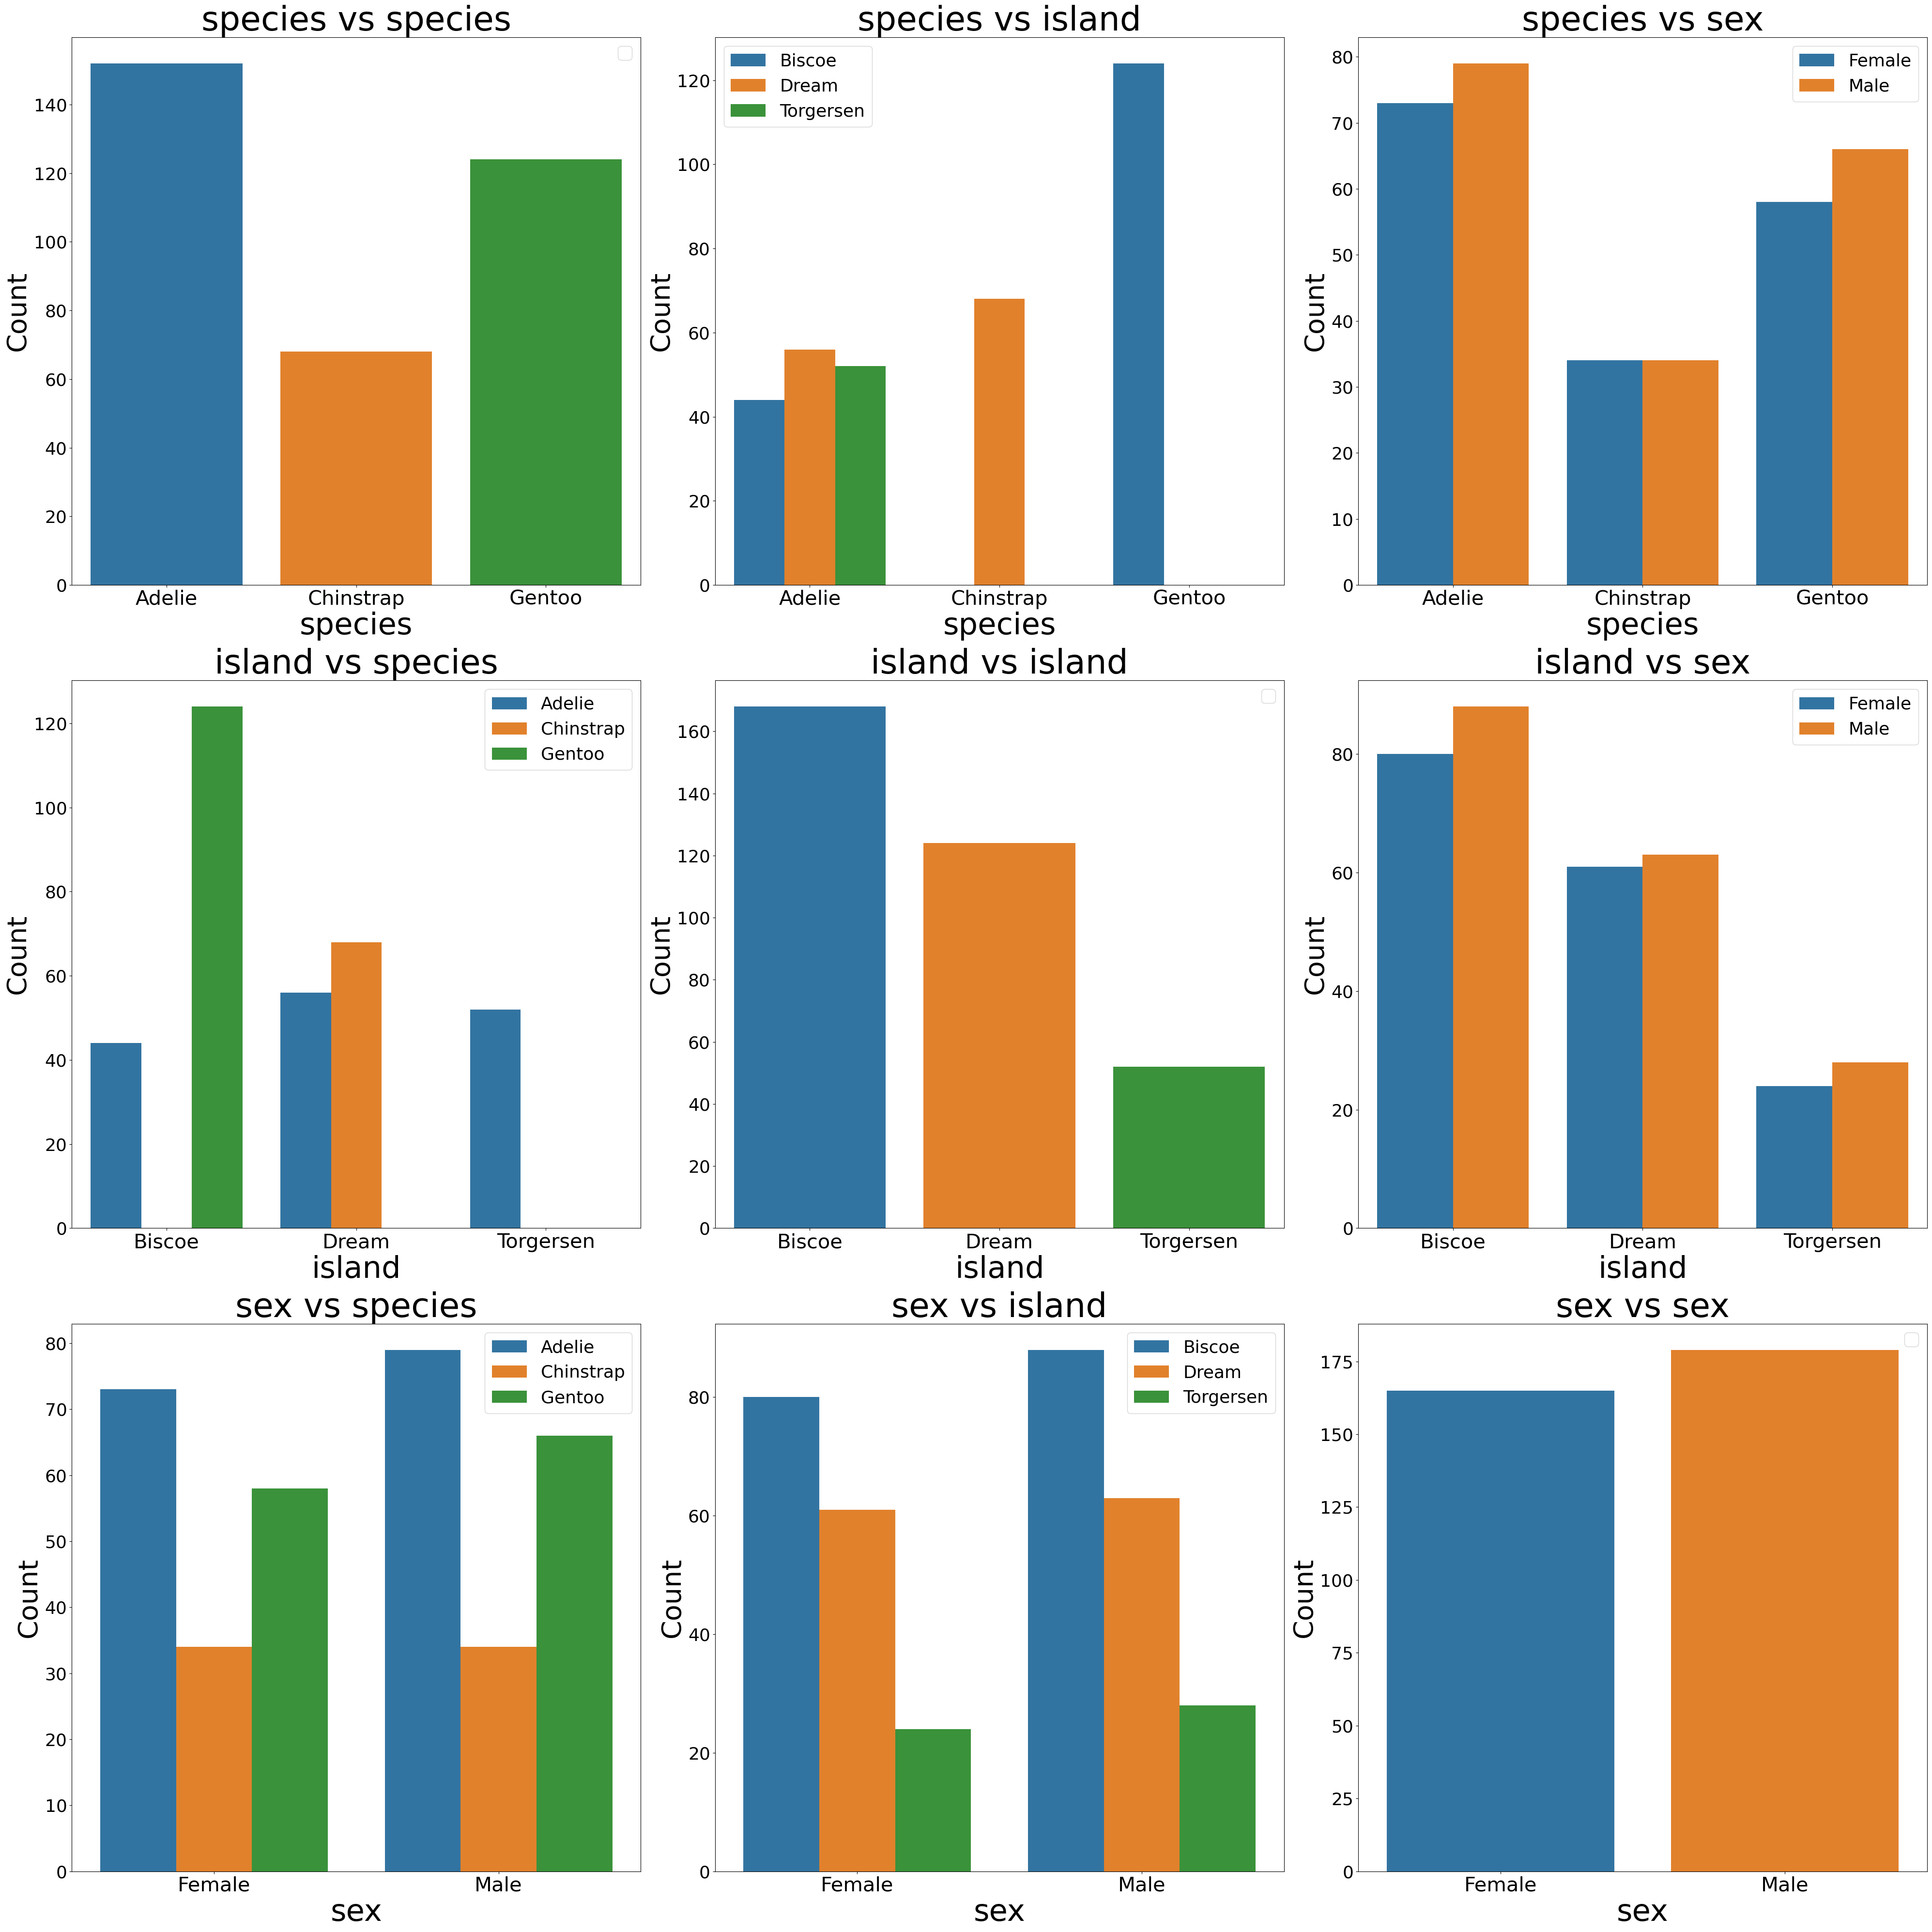

In [68]:
fig, axes = plt.subplots(3, 3, figsize=(40, 40))

for i, col1 in enumerate(cat_cols):
    for j, col2 in enumerate(cat_cols):
        ax = axes[i][j]
        sns.countplot(x=df[col1], hue=df[col2], ax=ax)
        ax.set_title(f"{col1} vs {col2}", fontsize=50)
        ax.set_xlabel(col1, fontsize=45)
        ax.set_ylabel("Count", fontsize=40)
        ax.tick_params(axis='x', labelsize=30)  # Rotate x-labels for clarity
        ax.tick_params(axis='y', labelsize=26)
        ax.legend(fontsize=26)

plt.tight_layout()
plt.show()

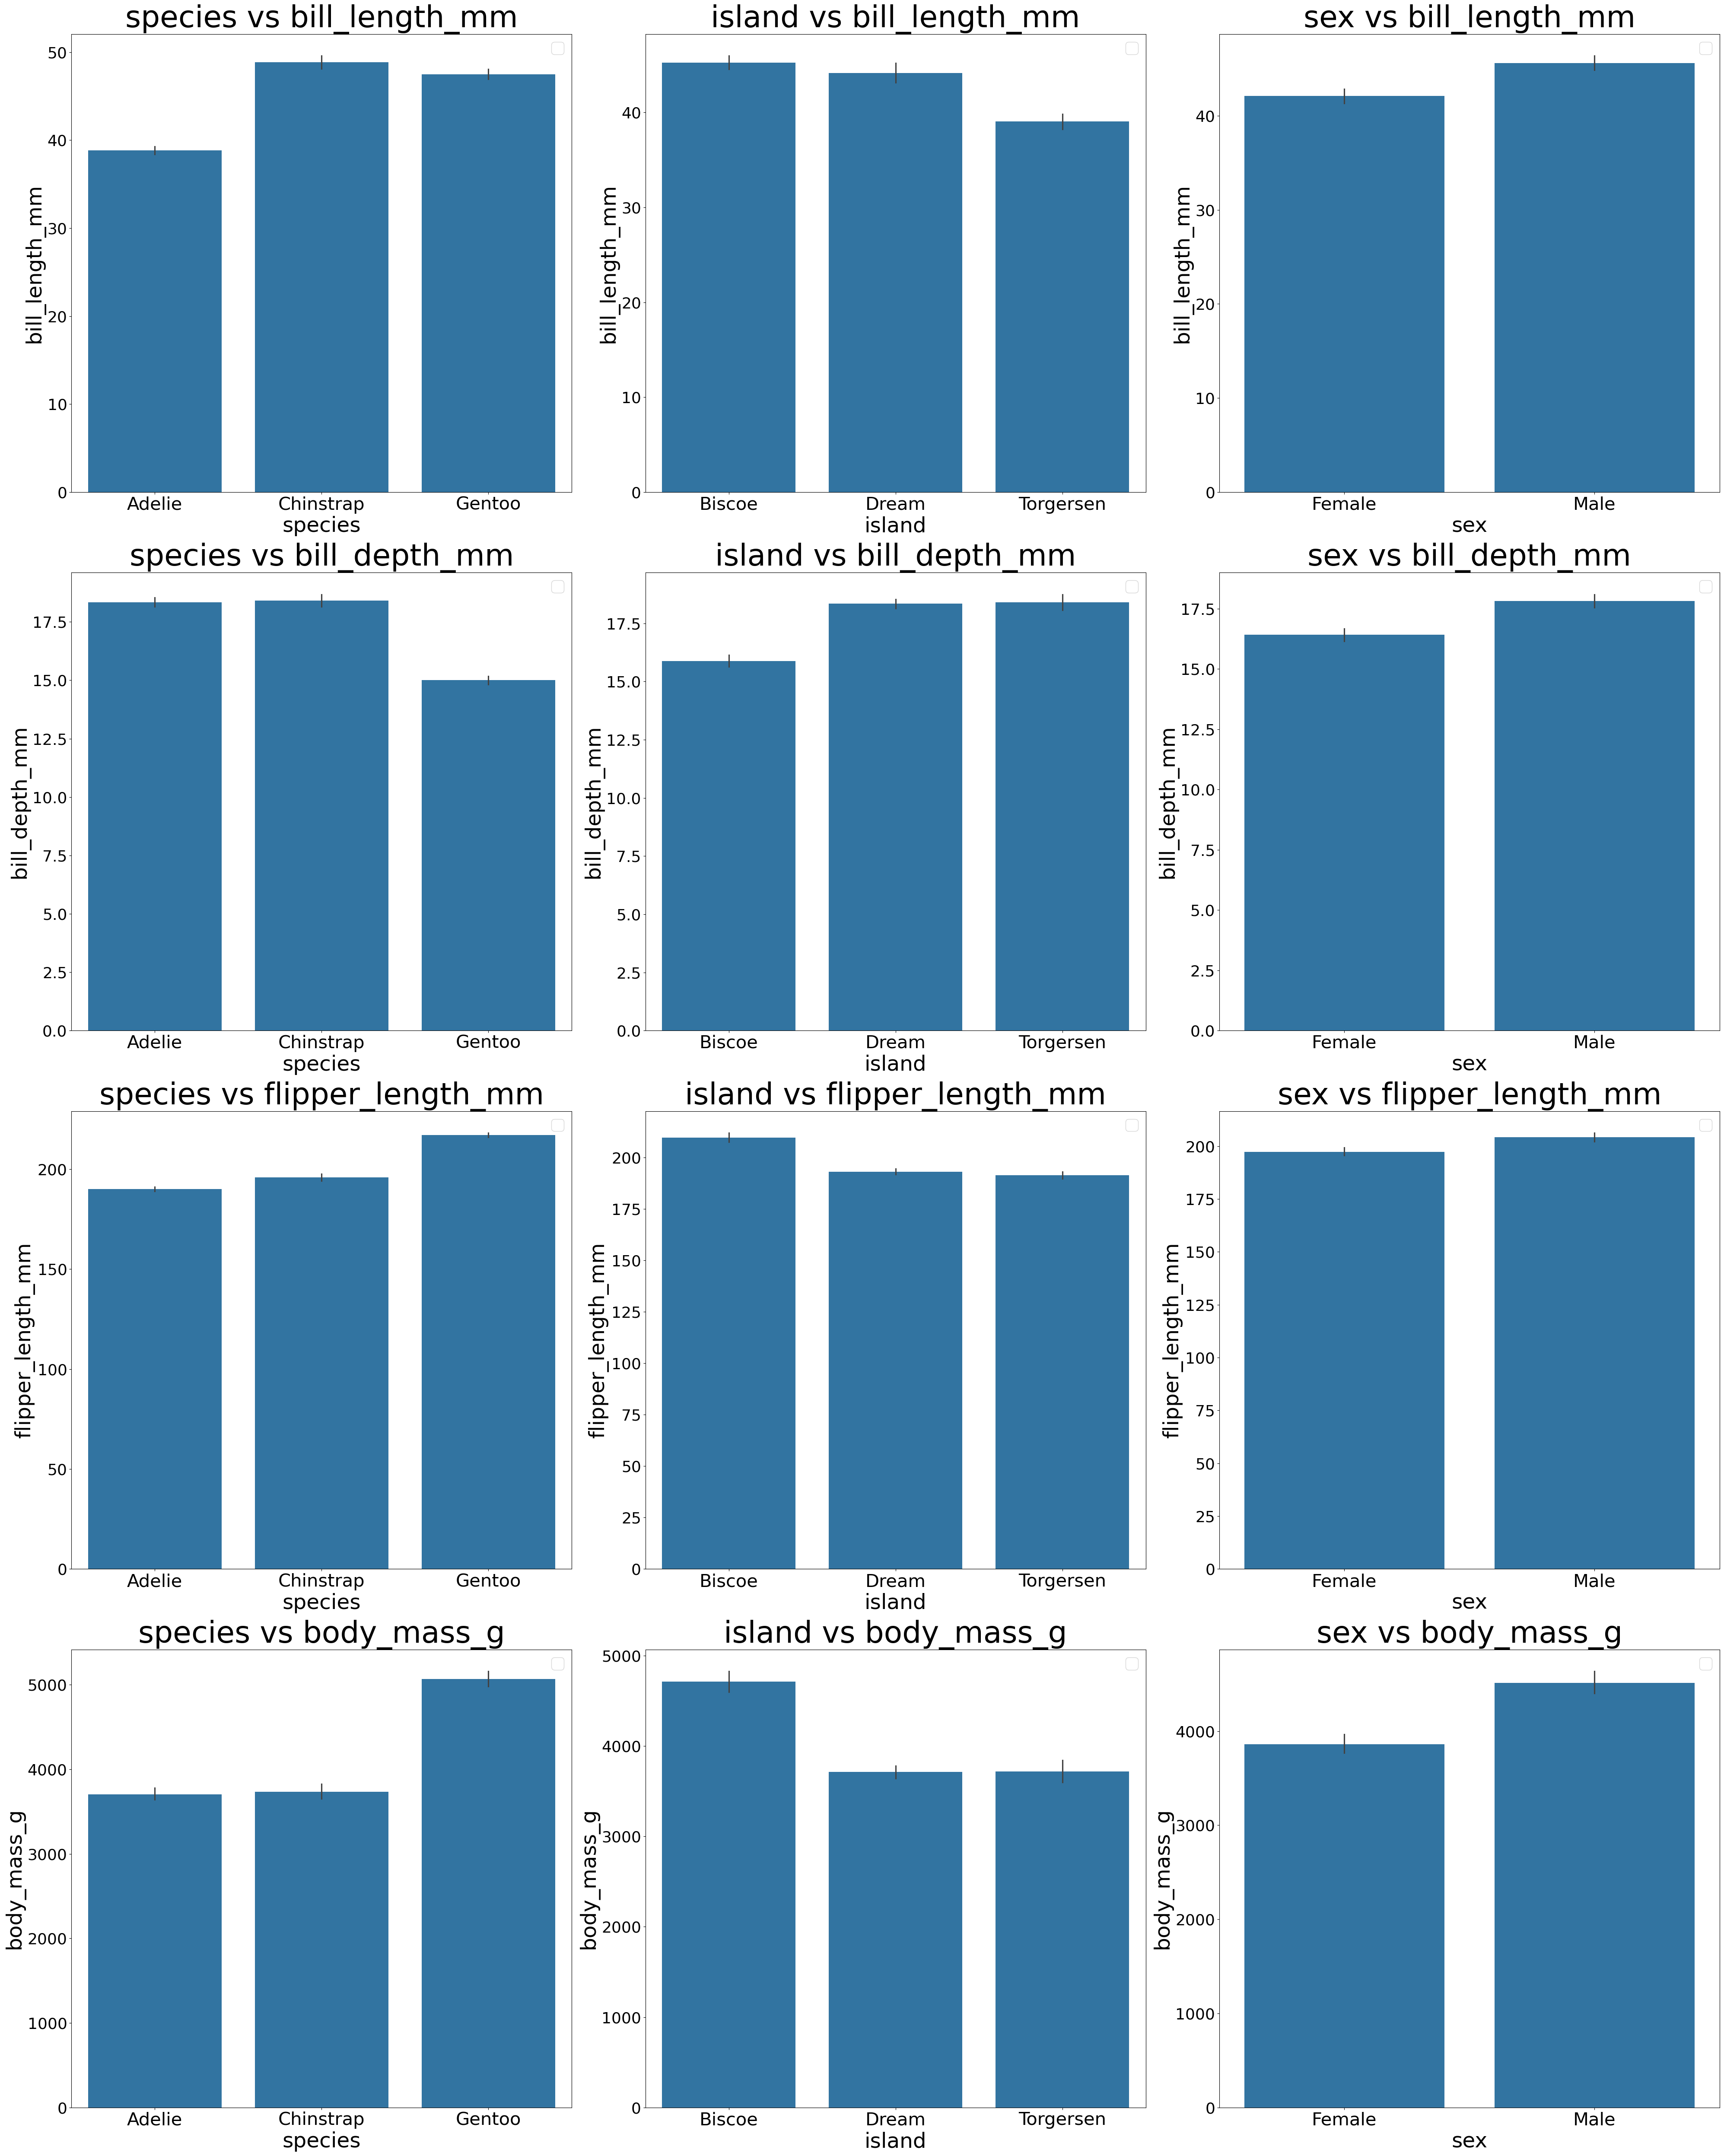

In [97]:
fig,axes = plt.subplots(4,3 , figsize = (40,50))
for i,col1 in enumerate(num_cols):
    for j,col2 in enumerate(cat_cols):
        ax = axes[i][j]
        sns.barplot(x = df[col2],y = df[col1],ax=ax)
        ax.set_title(f"{col2} vs {col1}", fontsize=50)
        ax.set_xlabel(col2, fontsize=35)
        ax.set_ylabel(col1, fontsize=35)
        ax.tick_params(axis='x', labelsize=30)  # Rotate x-labels for clarity
        ax.tick_params(axis='y', labelsize=26)
        ax.legend(fontsize=26)
plt.tight_layout()    
plt.show()

### 3. Multi Variate Visualization

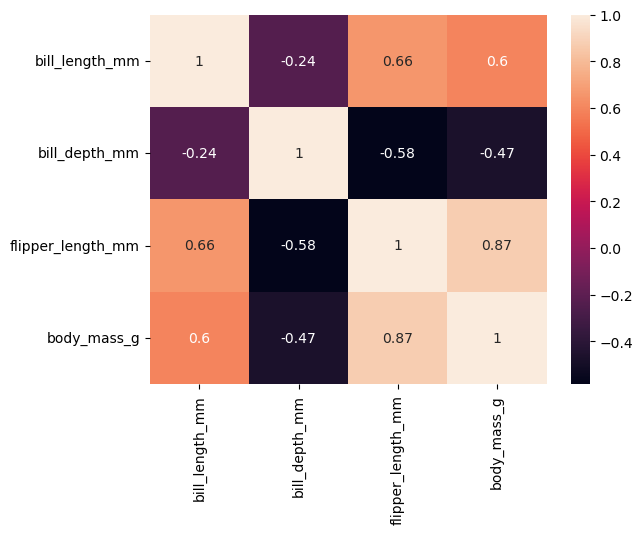

In [75]:
sns.heatmap(df[num_cols].corr(),annot = True)
plt.show()

# Observations :
- There are no outliers observed in any of the numerical columns
- from kde plots we can observe the bill_depth is slightly negatively skewed and flipper_lenght and body_mass are positively skewed
- Adelie species has the most frequency and Chinstrap species has least number of frequency.
- Biscoe island has most number of frequency
- bill_length_mm and flipper_length_mm , also bill_length_mm and body_mass_g are weakly +ve related as observed in heatmap
- flipper_length_mm and body_mass_g are strongly +ve related.
- flipper length and bill depth are weakly -ve related.
- looks like bill_depth_mm and flipper_length_mm have two categories as observed in scatter plot and same case for bill_depth_mm and body_mass_g.
- from the category-category plots , we can observe that on the island of Biscoe we dont have Chinstrap species penguins , on the island of Dreamisland we dont have Gentoo species penguins and on the island of Torgersen we dont have both Chinstrap and Gentoo species of penguins.
- Male penguins have larger 'bill_length_mm', 'bill_depth_mm','flipper_length_mm' and 'body_mass_g' than Female penguins.
- Gentoo species penguins have higher flipper_length and body_mass but less bill_depth compared to other.